In [1]:
import pandas as pd
import numpy as np
from glob import glob
import os
%matplotlib inline

In [2]:
cwd = os.getcwd()
data_dir = os.path.join(os.pardir, 'data', 'whale')
img_dir = os.path.join(os.pardir, 'data', 'whale', 'imgs', 'vgg')


In [3]:
cwd

'/home/ubuntu/courses/deeplearning1/nbs/whale'

In [4]:
% cd ../data/whale

/home/ubuntu/courses/deeplearning1/nbs/data/whale


In [5]:
tr = pd.read_csv('train.csv')

In [ ]:
tr.head()

- So it looks like using a vgg alone will not work.
- So what can you do that would be better. Why is it learning all uniform.
- It seems like it would be very tough to identify the whales. They look very similar. Different angles could have an effect. In some photos there is very little to see. 
- Building a whale detector and cropping the images to just see the whales could help. However, then the aspect ratio could be off. It could be worth it. But it would be a pain.
- Maybe see if a bigger size works.
- Then see what a submission that follows the distribution of the training test would score.
- Then try a sampling/training set manipulation
- The water color is different in the photos. Perhaps using that might be better?


- So a purely class proportional submission scores 5.979. You need to do better than that.
- It was also be tough to beat that, as that score already beats 2/3 of the leaderboard.

- Perhaps the right approach is to your training and validation sets look like the overall distribution of the whales. Then, when you train, you can compare your performance to your benchmark to see if your model is learning anything.





# Proportional Submission

In [6]:
samp = pd.read_csv('sample_submission.csv')

In [7]:
tr.head()

,Image,whaleID
0,w_7812.jpg,whale_48813
1,w_4598.jpg,whale_09913
2,w_3828.jpg,whale_45062
3,w_8734.jpg,whale_74162
4,w_3251.jpg,whale_99558


In [10]:
prop = tr.whaleID.value_counts() / len(tr)

In [38]:
prop

whale_95370    0.010343
whale_38681    0.009463
whale_28892    0.007262
whale_90957    0.006602
whale_36851    0.006602
whale_24458    0.006382
whale_85464    0.006162
whale_51195    0.006162
whale_65586    0.005942
whale_52749    0.005722
whale_89615    0.005282
whale_34656    0.005282
whale_08017    0.005282
whale_78280    0.005282
whale_68116    0.005062
whale_79823    0.005062
whale_73666    0.005062
whale_95091    0.005062
whale_70138    0.004842
whale_48966    0.004842
whale_26288    0.004842
whale_48813    0.004842
whale_87291    0.004842
whale_61461    0.004621
whale_74232    0.004621
whale_03227    0.004621
whale_87604    0.004621
whale_17604    0.004621
whale_66353    0.004621
whale_23821    0.004401
                 ...   
whale_07331    0.000440
whale_09422    0.000440
whale_97440    0.000440
whale_69943    0.000440
whale_80124    0.000440
whale_44699    0.000440
whale_88085    0.000220
whale_77984    0.000220
whale_88226    0.000220
whale_51332    0.000220
whale_54497    0

In [13]:
samp.head()

,Image,whale_00195,whale_00442,whale_02411,whale_02608,whale_02839,whale_03103,whale_03227,whale_03623,whale_03728,...,whale_98618,whale_98633,whale_98645,whale_98746,whale_98939,whale_98996,whale_99243,whale_99326,whale_99558,whale_99573
0,w_1947.jpg,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,w_11096.jpg,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,w_10973.jpg,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,w_10442.jpg,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,w_10606.jpg,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
prop.shape

(447,)

In [21]:
cols = ['Image']
cols.extend(list(prop.index.values))
cols

['Image',
 'whale_95370',
 'whale_38681',
 'whale_28892',
 'whale_90957',
 'whale_36851',
 'whale_24458',
 'whale_85464',
 'whale_51195',
 'whale_65586',
 'whale_52749',
 'whale_89615',
 'whale_34656',
 'whale_08017',
 'whale_78280',
 'whale_68116',
 'whale_79823',
 'whale_73666',
 'whale_95091',
 'whale_70138',
 'whale_48966',
 'whale_26288',
 'whale_48813',
 'whale_87291',
 'whale_61461',
 'whale_74232',
 'whale_03227',
 'whale_87604',
 'whale_17604',
 'whale_66353',
 'whale_23821',
 'whale_11076',
 'whale_39915',
 'whale_23525',
 'whale_30331',
 'whale_11242',
 'whale_55079',
 'whale_06339',
 'whale_09651',
 'whale_35594',
 'whale_52505',
 'whale_64634',
 'whale_34663',
 'whale_77693',
 'whale_52342',
 'whale_72820',
 'whale_82548',
 'whale_59173',
 'whale_17785',
 'whale_90911',
 'whale_73136',
 'whale_38008',
 'whale_43971',
 'whale_23847',
 'whale_79199',
 'whale_32087',
 'whale_52759',
 'whale_67036',
 'whale_92153',
 'whale_83892',
 'whale_40169',
 'whale_24815',
 'whale_33140'

In [22]:
samp.columns = cols

In [23]:
samp.head()

,Image,whale_95370,whale_38681,whale_28892,whale_90957,whale_36851,whale_24458,whale_85464,whale_51195,whale_65586,...,whale_45294,whale_04480,whale_86081,whale_08729,whale_66539,whale_54796,whale_81915,whale_22848,whale_51114,whale_40483
0,w_1947.jpg,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,w_11096.jpg,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,w_10973.jpg,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,w_10442.jpg,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,w_10606.jpg,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
samp[prop.index.values] = prop.values

In [37]:
samp.to_csv('proportional.csv', index=False)

In [28]:
from IPython.display import FileLink

In [33]:
% pwd

u'/home/ubuntu/courses/deeplearning1/nbs/data/whale'

In [36]:
FileLink(os.path.join(os.getcwd(), 'proportional.csv'))

/home/ubuntu/courses/deeplearning1/nbs/data/whale/proportional.csv

Proportional scores 5.979

# Look at images

In [7]:
from PIL import Image

In [10]:
% cd $img_dir
% cd train

/home/ubuntu/courses/deeplearning1/nbs/data/whale/imgs/vgg
/home/ubuntu/courses/deeplearning1/nbs/data/whale/imgs/vgg/train


In [11]:
import os

In [12]:
g = os.walk(os.getcwd())

In [13]:
p,d,f = g.next()

In [19]:
from glob import glob 

In [65]:
#d = np.array(d)
d = np.random.permutation(d)

In [66]:
imgs = []
for dr in d[:20]:
    dest = os.path.join(os.getcwd(), dr)
    g = glob(dest+'/*.jpg')
    imgs.append(g[0])


In [27]:
import matplotlib.pyplot as plt

In [67]:

def showImage(imgs):
    for img in imgs:
        yield Image.open(img)
    

In [68]:
g = showImage(imgs)

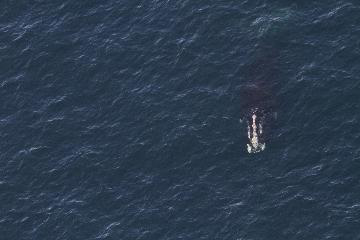

In [69]:
g.next()

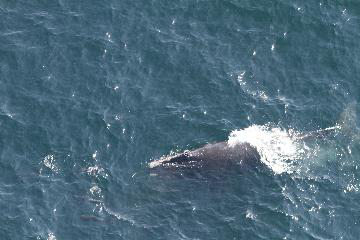

In [70]:
g.next()

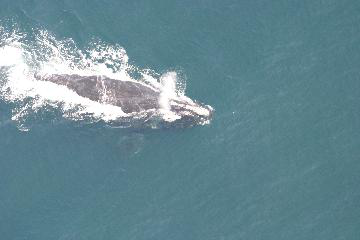

In [71]:
g.next()

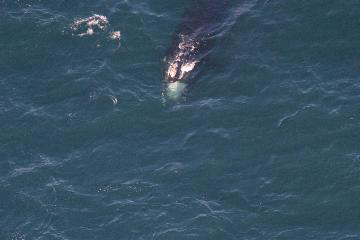

In [72]:
g.next()

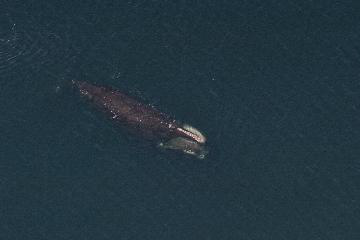

In [73]:
g.next()

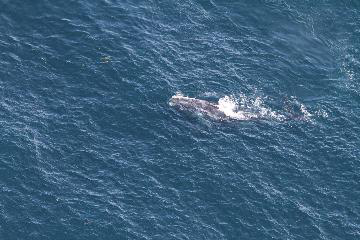

In [74]:
g.next()

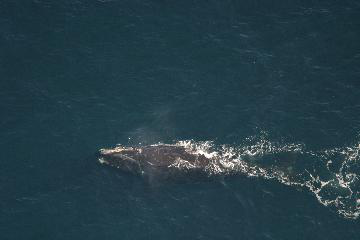

In [75]:
g.next()

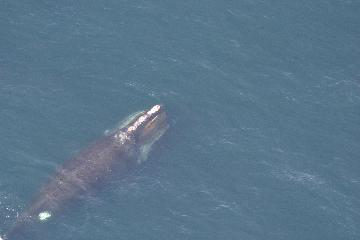

In [76]:
g.next()

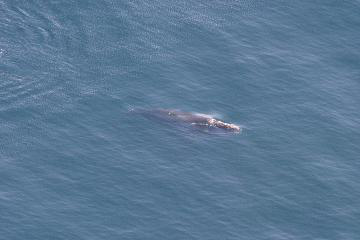

In [77]:
g.next()

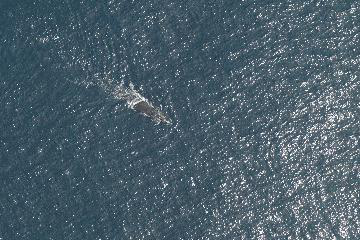

In [78]:
g.next()

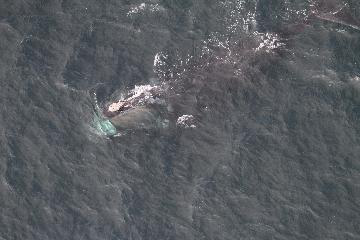

In [79]:
g.next()

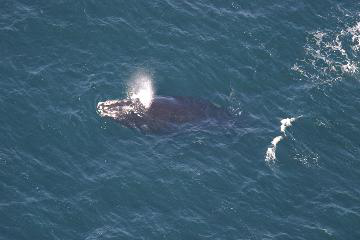

In [80]:
g.next()

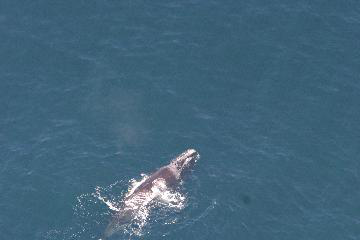

In [81]:
g.next()

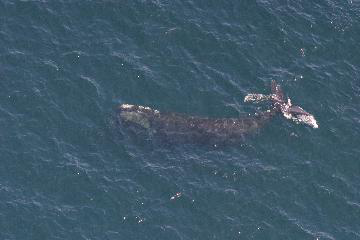

In [82]:
g.next()

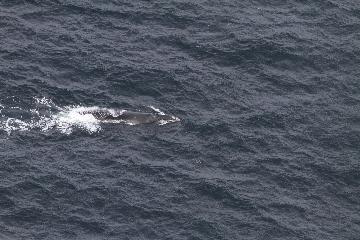

In [83]:
g.next()

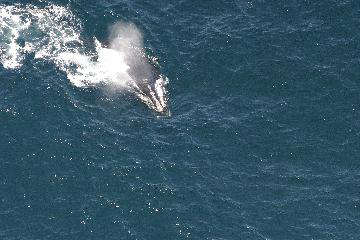

In [84]:
g.next()

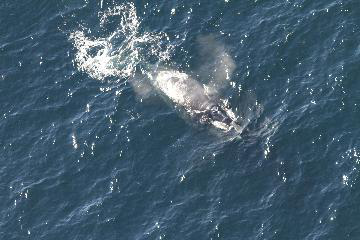

In [85]:
g.next()

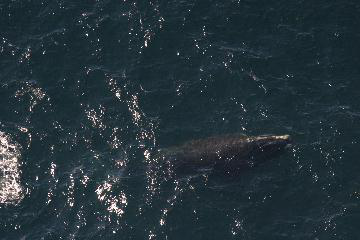

In [86]:
g.next()

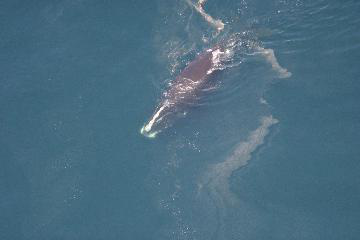

In [87]:
g.next()

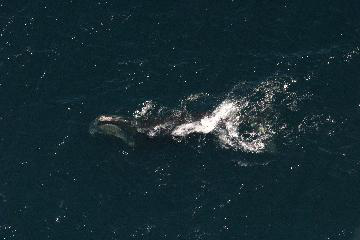

In [88]:
g.next()

In [89]:
g.next()

StopIteration: 

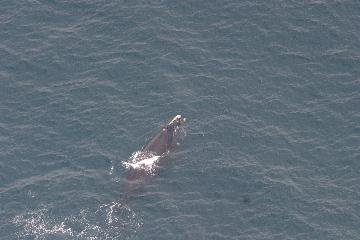

In [41]:
g.next()

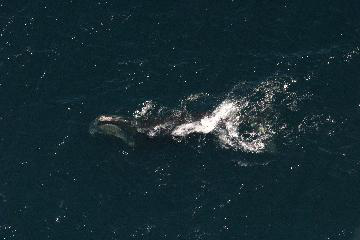

In [58]:
g.next()

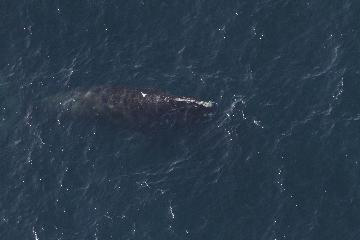

In [59]:
g.next()

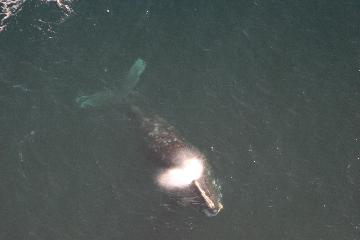

In [60]:
g.next()

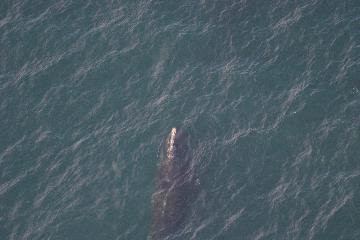

In [61]:
g.next()

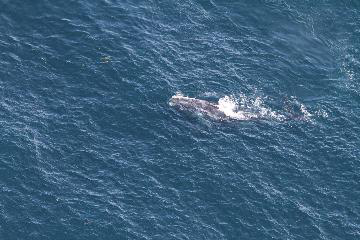

In [62]:
g.next()

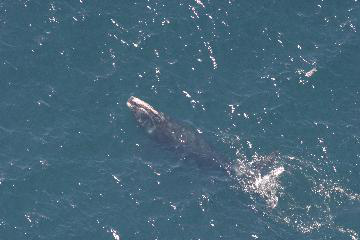

In [63]:
g.next()

In [64]:
g.next()

StopIteration: 

### Make the test directory and move the test files to that directory.

### Make the test directory and move the test files to that directory.

### Make the test directory and move the test files to that directory.

In [14]:
% mkdir test 

In [15]:
os.getcwd()

'/home/ubuntu/courses/deeplearning1/nbs/data/whale/imgs'

In [17]:
imgs = glob('*.jpg')

In [18]:
len(imgs)

11469

In [19]:
files = pd.DataFrame(imgs, columns=['filename'])

In [20]:
files.head()

,filename
0,w_8037.jpg
1,w_2255.jpg
2,w_4494.jpg
3,w_3674.jpg
4,w_4673.jpg


In [21]:
test = files[~files.filename.isin(tr.Image)]

In [22]:
test.shape

(6925, 1)

In [23]:
os.path.join(os.getcwd(), test.iloc[0].filename)

'/home/ubuntu/courses/deeplearning1/nbs/data/whale/imgs/w_8037.jpg'

In [24]:
os.path.join(os.getcwd(), 'test', test.iloc[0].filename)

'/home/ubuntu/courses/deeplearning1/nbs/data/whale/imgs/test/w_8037.jpg'

In [26]:
for fname in test.filename:
    os.rename(os.path.join(os.getcwd(), fname),os.path.join(os.getcwd(), 'test', fname))


In [27]:
% cd test

/home/ubuntu/courses/deeplearning1/nbs/data/whale/imgs/test


In [28]:
% mkdir unknown

In [29]:
% mv *.jpg unknown/

In [30]:
% cd unknown

/home/ubuntu/courses/deeplearning1/nbs/data/whale/imgs/test/unknown


In [31]:
test_files = glob('*.jpg')

In [34]:
assert len(test_files) == len(sub)

### Create a validation set

In [37]:
% mkdir $data_dir/imgs/valid

In [38]:
% mkdir $data_dir/imgs/train

In [42]:
% cd $data_dir/imgs/

/home/ubuntu/courses/deeplearning1/nbs/data/whale/imgs


In [43]:
% mv *.jpg train/

In [44]:
% cd $data_dir/imgs/train

/home/ubuntu/courses/deeplearning1/nbs/data/whale/imgs/train


In [45]:
g = glob('*.jpg')

In [48]:
len(g)

4544

In [50]:
valid_df = tr.sample(frac=0.2)

In [52]:
len(valid_df)

909

In [53]:
tr_df = tr[~tr.Image.isin(valid_df.Image)]

In [54]:
len(tr_df)

3635

In [57]:
assert len(tr_df) + len(valid_df) == len(tr)

In [61]:
for name in valid_df.Image:
    os.rename(os.path.join(os.getcwd(), name), os.path.join(data_dir,'imgs', 'valid', name))

### Make directories for each whale and move the images there

In [62]:
% pwd

u'/home/ubuntu/courses/deeplearning1/nbs/data/whale/imgs/train'

In [63]:
for whale in tr_df.whaleID.unique():
    os.mkdir(whale)

In [68]:
assert len(folds) ==  len(tr_df.whaleID.unique())

In [71]:
for r in tr_df.iterrows():
    folder = r[1].whaleID
    fname = r[1].Image
    try:
        os.rename(os.path.join(os.getcwd(), fname), os.path.join(os.getcwd(), folder, fname))
    except:
        print(r)

In [72]:
% cd $data_dir/imgs/valid

/home/ubuntu/courses/deeplearning1/nbs/data/whale/imgs/valid


In [74]:
for whale in valid_df.whaleID.unique():
    os.mkdir(whale)

In [78]:
for r in valid_df.iterrows():
    folder = r[1].whaleID
    fname = r[1].Image
    try:
        os.rename(os.path.join(os.getcwd(), fname), os.path.join(os.getcwd(), folder, fname))
    except:
        print(r)